# All faces dataset
The all faces dataset is a dataset of 64 columns and 38 rows. The rows represent a person and the 64 columns represent images of different angles at which the light falls on the people. First we are going to see how the dataset looks. We are going to plot the first 36 people in this EigenFaces dataset. We are going to use these 36 people to build a EigenFace basis, that can be used to represent all human faces in. We are going to use the 2 people that we left out for testing, checking how good the basis is on predicting these two. For each of these faces, as said earlier, we have 63 more images that are shot with different lighting conditions.

To download the dataset:
  !wget https://www.dropbox.com/s/amcv30x5o17l1y8/allFaces.mat?dl=0

In [2]:
!wget https://www.dropbox.com/s/amcv30x5o17l1y8/allFaces.mat

--2020-07-12 10:49:34--  https://www.dropbox.com/s/amcv30x5o17l1y8/allFaces.mat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/amcv30x5o17l1y8/allFaces.mat [following]
--2020-07-12 10:49:34--  https://www.dropbox.com/s/raw/amcv30x5o17l1y8/allFaces.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2716708d110a2cb68cb5def39e.dl.dropboxusercontent.com/cd/0/inline/A7avjxt9J5AlRz-Ybe7W7t5uuvC7k1hsXQK41DLFX9HPVkZTDyR41u9-BN-kTtAMFrrC1TtClm7klKoG6N7V1txycbEBj6j6yUPxShhBPqp03odfg8FEwMifYJFUCFQZe-c/file# [following]
--2020-07-12 10:49:34--  https://uc2716708d110a2cb68cb5def39e.dl.dropboxusercontent.com/cd/0/inline/A7avjxt9J5AlRz-Ybe7W7t5uuvC7k1hsXQK41DLFX9HPVkZTDyR41u9-BN-kTtAMFrrC1TtClm7klKoG6N7V1txycbEBj6j6yUPxShhBPqp03od

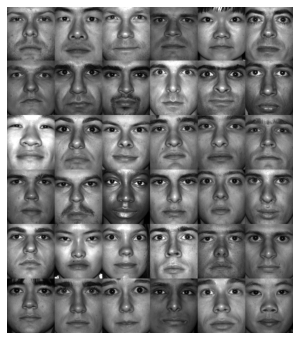

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('/content','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Computing EigenFaces
In the next step we are going to compute the EigenFaces. Our X is going to be loaded with faces that are placed into columns. First thing that we are going to do is computing the mean face, average column face, and subtract it from the other faces. Next step is computing the SVD on that X. We are going to plot the average face and also the U matrix from the SVD that has the same size as the faces, so it can also be reshaped into EigenFaces, that's what we are going to do.

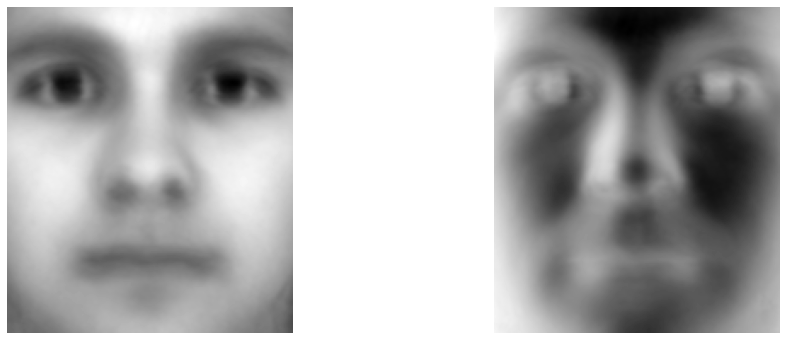

In [4]:
# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T, cmap=plt.cm.gray)
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

The results look like ghost faces. Essentially we are taking a linear combination of these eigen faces in the columns of U and it will recover an image of the first, second, etc person. We can see from this that every face image of a person is a linear combination of these eigen faces.

Let's use the image from person 37 that was not used to train and we are going to see how this face looks when we project it down into a subspace and reconstruct it with those modes. We are going to vary our r (rank). Our goal is to represent that face as close as possible by using just a couple of components.

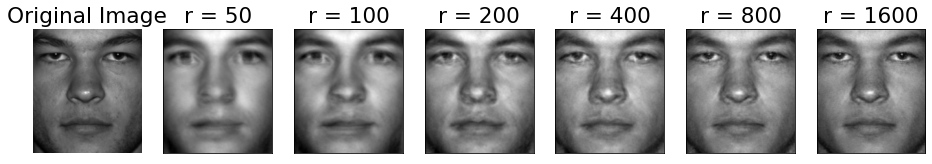

In [5]:
fig = plt.figure()

testFace = faces[:,np.sum(nfaces[:36])] # Person 37
ax = fig.add_subplot(1, 7, 1, xticks=[], yticks=[])
ax.imshow(np.reshape(testFace,(m,n)).T, cmap=plt.cm.gray)
plt.title('Original Image')
ax.axis('off')

testFaceMS = testFace - avgFace
r_list = [50, 100, 200, 400, 800, 1600]

i = 1
for r in r_list:
    reconFace = avgFace + np.matmul(U[:,:r], np.matmul(U[:,:r].T, testFaceMS))
    ax = fig.add_subplot(1, 7, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(reconFace,(m,n)).T, cmap=plt.cm.gray)
    plt.title('r = ' + str(r))
    i+=1
plt.show()

The reconstructed face is pretty simple, we just add the average face plus the matrix U with the rank r multiplied with itself transposed and multiplied with the test face. As r goes up we can see that the image starts to look like the original image, this indicates that you can get away with a small amount of information.

Next thing we can do is to use this for image classification. Instead of doing classification in a high dimension (megapixel), we can take that image and project it into the first r dimensional eigen face cordinates. As an output we get a small a or α which is kind of a fingerprint for that persons face in this basis. We will now show that in this low dimensional space we can have people cluster and see that we can use that cluster for classification purposes. Example: if i place a person in this classificator, it can tell me if it belongs to a group A or group B, etc.  

Now let's take the third and eleventh person's face and project them into the fifth and sixth column of U, we are going to compute the inner product of all of the images with the third and eleventh column. This outputs a two dimensional vector a or α. When we plot the data, we are ploting it in principal component 5 vs principal component 6.

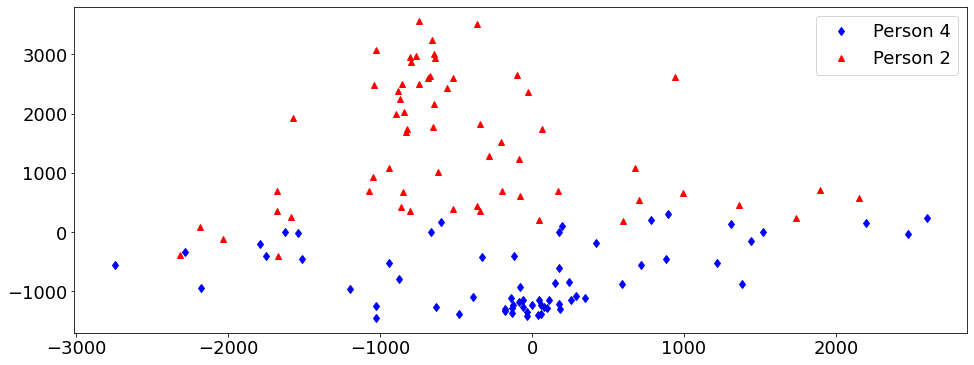

In [ ]:
# Project person 4 and 2 onto PC5 and PC6

P1num = 4 # Person number 4
P2num = 2 # Person number 2

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = np.matmul(U[:,PCAmodes-np.ones_like(PCAmodes)].T, P1)
PCACoordsP2 = np.matmul(U[:,PCAmodes-np.ones_like(PCAmodes)].T, P2)

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',Color='b',label='Person 4')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',Color='r',label='Person 2')

plt.legend()
plt.show()

From the plot we can see that the data pretty much clusters perfectly. This means we can build a pretty efficient and accurate classifier. We chose PC5 and PC6 for a reason. PC1 usually encodes all the information that is the same in faces (eyes, mouth, etc..). The information that is different from person to person that is encoded in the lower energy singular values. 

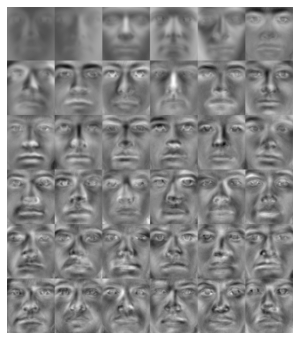

In [ ]:
allPersons2 = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons2[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(U[:, count],(m,n)).T
        count+=1
    
img = plt.imshow(allPersons2)
img.set_cmap('gray')
plt.axis('off')
plt.show()

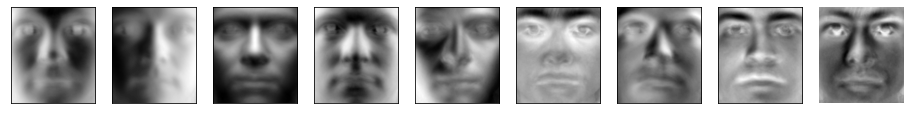

In [10]:
fig = plt.figure(figsize=(16, 4))

for i in range(9):
  ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
  ax.imshow(np.reshape(U[:, i], (m, n)).T, cmap=plt.cm.gray)

img.set_cmap('gray')
plt.axis('off')
plt.show()

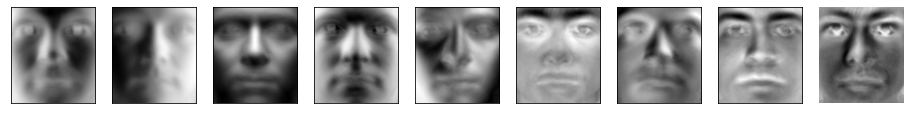

In [ ]:
fig = plt.figure(figsize=(16, 4))

for i in range(9):
  ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
  ax.imshow(np.reshape(avgFace + (3 * S[i]) * U[:, i], (m, n)).T, cmap=plt.cm.gray)

img.set_cmap('gray')
plt.axis('off')
plt.show()